<h1><center> <font color='black'> Business Data Analytics - Practice Session_04 </font></center></h1>
<h2><center> <font color='black'> Customer Lifecycle Management - Regression</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2020</font></center></h3>

=============================================================================================================

## Introduction:

1. <font size="2">Business relationships with the customers are not **static** – they change over time. It is crucial for the company to understand these dynamic processes.</font>


2. <font size="2">The customer relationship management **(CRM)** is a huge area that encompasses multiple practices, directions, and approaches related to customer interactions with the business.</font>


3. <font size="2">One of the central directions is the **Customer Lifecycle Value (CLV)**,which represents the expected revenu earned from custmer over their lifetime and this is the topic of today's session. **We will illustrate two different approaches to study:** </font>

    * <font size="2">**The first approach** that we will study is based on **heuristics**, where we do not use any automatic methods, but a fairly simple analysis in order to calculate Customer Lifetime Value (CLV). </font>      
        
    * <font size="2">Then, we will learn how to use **simple and multiple linear regressions** in the context of CRM. We will follow the machine learning practices discussed during the lecture.</font>



========================================================================================

## Let’s load the required packages:

In [1]:
print('hello')

hello


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)



## Read customer transaction dataset

In [3]:
# read customer transaction data using pandas package as a dataframe
df = pd.read_csv("lab_04_clv_transactions.csv")

# get the first 10 rows from the df
df.head(10)

,transaction_id,transaction_date,customer_id,amount
0,1,2012-09-04,1,20.96
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94
5,6,2013-01-23,2,12.37
6,7,2014-03-09,2,1.59
7,8,2013-11-17,2,2.75
8,9,2014-10-10,2,3.51
9,10,2012-11-26,3,21.58


**CLV transaction dataset contains four column as follow:**
* **transaction_id** - unique ID of some transaction;
* **transaction_date** - date when transaction was executed;
* **customer_id** - unique ID of the customer;
* **amount** - total amount of money per transaction.


In [4]:
# get info about our df
df.info()

print(" ")
# summary statistics 
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 4 columns):
transaction_id      4181 non-null int64
transaction_date    4181 non-null object
customer_id         4181 non-null int64
amount              4181 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 130.8+ KB
 
       transaction_id  customer_id       amount
count     4181.000000  4181.000000  4181.000000
mean      2091.000000   516.332217     8.067426
std       1207.095067   291.209738     6.007071
min          1.000000     1.000000     0.010000
25%       1046.000000   270.000000     3.310000
50%       2091.000000   522.000000     6.880000
75%       3136.000000   762.000000    11.690000
max       4181.000000  1000.000000    38.350000


=========================================================================================

## <font color='black'> Customer Lifecycle Value:</font>

<font size="2">Our goal here is to calculate **CLV**, which is `the expected revenu earned from custmer over their lifetime during the entire relationship with the company.` CLV is a metric that can be used for many different purposes:</font>

* <font size="2">Estimation of the customer value in order to target the most valuable ones.
* <font size="2">Reference for the markieting campaigns: how much to spend or wheher to spend? and monitoring the impact of such campaign.
* <font size="2">Measurement of customer loyalty.
* <font size="2">Optimization of resource allocation.
* <font size="2">etc..
   

<font size="2">There are many methodologies of CLV, which can be very complex and include all the details taking into account all the spendings. More generally.  **CLV can be divided into two broad categoris:**</font>
1. <font size="2">**Historical CLV**:  where we do not use any automatic methods, but a fairly simple analysis in order to calculate Customer Lifetime Value (CLV).</font>

2. <font size="2">**Predictive CLV**: where we perform machine learning methods to apply predictive modles (Regression Problem).</font>

<font size="2">Let us take the simple approach and calculate the historical value.</font>



## Start with the simple approach and calculate the historical value.

**CLV** is the cumulative spending per customer over time divided by amount of new customers each year 

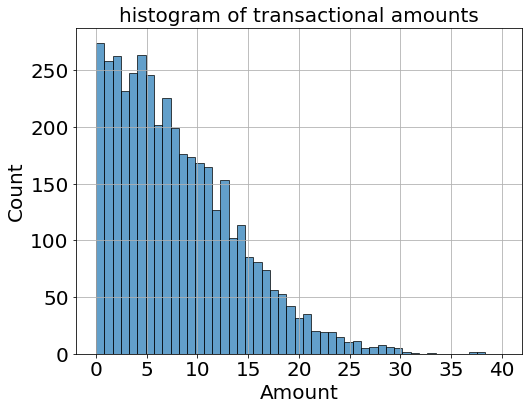

In [5]:
# histogram of transactional amounts
# Plot the distribution of all amounts that different customers spent
# with different transactions. 

# set figure properties
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

# histogram bins 
bins = np.linspace(0, 40)

# set titles for figure, x, y
plt.title('histogram of transactional amounts',fontsize=20)
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Count',fontsize=20)


# plot histogram using plt.hist()
plt.hist(df.amount, bins, alpha=0.7, histtype='bar', ec='black')

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

In [7]:
df.head()

,transaction_id,transaction_date,customer_id,amount
0,1,2012-09-04,1,20.96
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94


<font size="2">**Let’s keep the raw dataset unchanged and create a new dataset, where we start to collect required features about active customers:**
1. <font size="2"> `customers_unique`: number of unique customers for each year 
2. <font size="2"> `transactions_unique`: unique transaction for each year 	
3. <font size="2"> amount 	
4. <font size="2"> cumulative_amount
5. <font size="2">customer retention rate
6. <font size="2">transactions per customer
7. <font size="2">amount per transaction


1. <font size="2">get the year only from the transaction_date feature.

In [8]:
# copy the original df
df_year = df 

# we take only year
df_year['year'] = df_year.transaction_date.apply(lambda x: pd.to_datetime(x).date().year) 
df_year.head()

,transaction_id,transaction_date,customer_id,amount,year
0,1,2012-09-04,1,20.96,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2014
3,4,2014-10-24,2,10.48,2014
4,5,2012-10-13,2,3.94,2012


2. <font size="2">getting sample form the dataframe to check the timespan.

In [9]:
# take IDs of 10 random customers
# Get unique values from a list
# using sample() function
sample_customers = pd.Series(df_year.customer_id.unique()).sample(10).values 

# create new sample
df_sample = df_year[df_year.customer_id.isin(sample_customers)] 
df_sample.head() #


,transaction_id,transaction_date,customer_id,amount,year
565,566,2012-02-20,137,5.71,2012
1663,1664,2010-11-02,412,10.65,2010
1664,1665,2012-10-03,412,2.34,2012
1665,1666,2011-02-03,412,18.40,2011
1666,1667,2013-09-29,412,8.37,2013


3. <font size="2">Let’s check the timespan of a few customers to understand the data better:

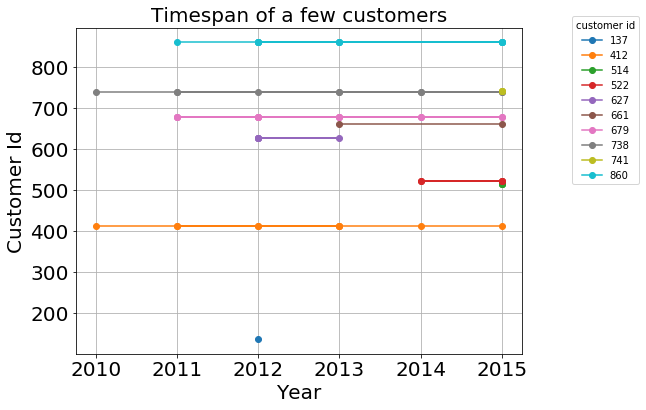

In [10]:
# group data by customer id
groups = df_sample.groupby('customer_id')

# Plot
fig, ax = plt.subplots(figsize=(8, 6))


# plot line for each customer 
for customer_id, group in groups:
    ax.plot(group.year, group.customer_id, marker='o', linestyle='-', label=customer_id)


# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.1, 1.05), title="customer id",)
    
# set titles for figure, x, y
plt.title('Timespan of a few customers',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Customer Id',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()


* <font size="2">**We can note several important things:**
    1. <font size="2">The customers are heterogeneous
    2. <font size="2">They spend at different years
    3.  <font size="2">Also they do not purchase every single year.
    
    
* <font size="2">**Now, here we have to make a decision how to define `active customers`.**</font>
    1. <font size="2">One definition would be to consider in our calculations any customer who kept purchasing (even if in this year he did not purchase anything).  </font>      
    
    2. <font size="2"> Or take into account (per year basis) only a set of customers who were purchasing in the considered year.</font> 
    

* <font size="2">**We will adopt the second approach as it will be more tricky to calculate:**

In [11]:
# group by customer id from our original df
group = df.groupby('customer_id')

# add 3 more columns (min_year, max_year, years_active) to our df 
df['min_year'] = group['year'].transform('min') # get min year
df['max_year'] = group['year'].transform('max') # get max year

df.head()

,transaction_id,transaction_date,customer_id,amount,year,min_year,max_year
0,1,2012-09-04,1,20.96,2012,2012,2012
1,2,2012-05-15,2,10.87,2012,2012,2014
2,3,2014-05-23,2,2.21,2014,2012,2014
3,4,2014-10-24,2,10.48,2014,2012,2014
4,5,2012-10-13,2,3.94,2012,2012,2014


## Ex 1:  

1. Using min_year, and max_year please calculate the number of active years for each custmer, and put the output in a new column to our df. Name the new column with `years_active`


In [33]:
# REFERENCE
# https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

#TODO: 
# df['years_active'] = ?

def countYear(maxYear,minYear):
        return maxYear - minYear + 1
    
df['years_active'] = df.apply(lambda x: countYear(x['max_year'],x['min_year']),axis=1)

df.head(10)

,transaction_id,transaction_date,customer_id,amount,year,min_year,max_year,years_active
0,1,2012-09-04,1,20.96,2012,2012,2012,1
1,2,2012-05-15,2,10.87,2012,2012,2014,3
2,3,2014-05-23,2,2.21,2014,2012,2014,3
3,4,2014-10-24,2,10.48,2014,2012,2014,3
4,5,2012-10-13,2,3.94,2012,2012,2014,3
5,6,2013-01-23,2,12.37,2013,2012,2014,3
6,7,2014-03-09,2,1.59,2014,2012,2014,3
7,8,2013-11-17,2,2.75,2013,2012,2014,3
8,9,2014-10-10,2,3.51,2014,2012,2014,3
9,10,2012-11-26,3,21.58,2012,2012,2015,4


In [0]:
#group['customer_id'].unique()[0].size

### Active customers: 

* we need to add the following features to our active custmers df:

1. customers_unique
2. transactions_unique
3. amount
4. cumulative_amount

In [0]:
df.head()

,transaction_id,transaction_date,customer_id,amount,year,min_year,max_year,years_active
0,1,2012-09-04,1,20.96,2012,2012,2012,1
1,2,2012-05-15,2,10.87,2012,2012,2014,3
2,3,2014-05-23,2,2.21,2014,2012,2014,3
3,4,2014-10-24,2,10.48,2014,2012,2014,3
4,5,2012-10-13,2,3.94,2012,2012,2014,3


In [24]:
# define new df for the active customers
active_customers = pd.DataFrame()

# group by two cols 
# group customers by the starting year and the transactional years.
group = df.groupby(['min_year', 'year'])

# start adding cols to active customer 

# number of unique customers for the pairs 
# (starting year, transactional year)
# number of unique customers for each year
active_customers['customers_unique'] = group['customer_id'].unique().apply(lambda x: x.size)

# number of unique transactions for each year
active_customers['transactions_unique'] = group['transaction_id'].unique().apply(lambda x: x.size)

# total amount of money spent in that year
active_customers['amount'] = group['amount'].sum()

#cumulative amount of money spent from previous years till current year
active_customers['cumulative_amount'] = group['amount'].sum().groupby(by='min_year').cumsum()

active_customers.head(10)

customers_unique  transactions_unique   amount  \
min_year year                                                   
2010     2010               172                  260  2255.07   
         2011                93                  177  1358.78   
         2012               104                  195  1658.02   
         2013                91                  164  1355.56   
         2014               103                  163  1295.52   
         2015                82                  128  1033.60   
2011     2011               170                  263  2238.46   
         2012                92                  189  1519.57   
         2013                98                  192  1707.09   
         2014                89                  155  1237.02   

               cumulative_amount  
min_year year                     
2010     2010            2255.07  
         2011            3613.85  
         2012            5271.87  
         2013            6627.43  
         2014            7922.95  
         2015            8956.55  
2011     2011            2238.46  
         2012            3758.03  
         2013            5465.12  
         2014            6702.14

In [25]:
# Pivot: allows you to transform or reshape data
# index = rows
# columns = cols


# # you can pick any feature to display 
# fillna('') to replace missing values with space
active_customers.reset_index().pivot(index='min_year', columns='year', values='customers_unique').fillna('')

year,2010,2011,2012,2013,2014,2015
min_year,,,,,,
2010,172,93,104,91,103,82.0
2011,,170,92,98,89,88.0
2012,,,163,109,98,90.0
2013,,,,180,103,102.0
2014,,,,,155,90.0
2015,,,,,,160.0


<font size="2">**The second part is to calculate for each year the number of new customers:**

In [26]:
# now will compute the amount of the new customers in each year
group = df.groupby(['min_year'])

new_customers = pd.DataFrame()
new_customers = group['customer_id'].unique().apply(lambda x: x.size).rename('new_customers')
new_customers.head(10)

min_year
2010    172
2011    170
2012    163
2013    180
2014    155
2015    160
Name: new_customers, dtype: int64

<font size="2">**Combine the two datasets active custmers and new customers:**

In [27]:
# using join to Combine the two datasets:

active_customers = active_customers.join(new_customers, on='min_year')
active_customers.head(10)

customers_unique  transactions_unique   amount  \
min_year year                                                   
2010     2010               172                  260  2255.07   
         2011                93                  177  1358.78   
         2012               104                  195  1658.02   
         2013                91                  164  1355.56   
         2014               103                  163  1295.52   
         2015                82                  128  1033.60   
2011     2011               170                  263  2238.46   
         2012                92                  189  1519.57   
         2013                98                  192  1707.09   
         2014                89                  155  1237.02   

               cumulative_amount  new_customers  
min_year year                                    
2010     2010            2255.07            172  
         2011            3613.85            172  
         2012            5271.87            172  
         2013            6627.43            172  
         2014            7922.95            172  
         2015            8956.55            172  
2011     2011            2238.46            170  
         2012            3758.03            170  
         2013            5465.12            170  
         2014            6702.14            170

<font size="2">**Now, we are ready to calculate several important measures:**
    

1. customer retention rate $=$ $\frac{active\_customers}{new\_ customers}$ 


2. transactions per customer $=$ $\frac{transactions}{active\_customers}$


3. amount per transaction $=$ $\frac{amount}{transactions}$

In [28]:
# new dataframe to hold different calculations
active_customers_stat = pd.DataFrame()


active_customers_stat = active_customers_stat.assign(
    customers_unique = active_customers['customers_unique'],
    retention = active_customers['customers_unique'] / active_customers['new_customers'], # retention
    trans_per_customer = active_customers['transactions_unique'] / active_customers['customers_unique'],
    amount_per_trans = active_customers['amount'] / active_customers['transactions_unique']
)


active_customers_stat = active_customers_stat.reset_index()
active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans
0,2010,2010,172,1.000000,1.511628,8.673346
1,2010,2011,93,0.540698,1.903226,7.676723
2,2010,2012,104,0.604651,1.875000,8.502667
3,2010,2013,91,0.529070,1.802198,8.265610
4,2010,2014,103,0.598837,1.582524,7.947975


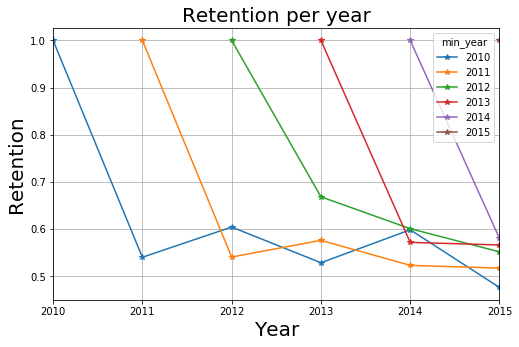

In [29]:
# here in this plot we look how retention rate change during five years
# plot 
active_customers_stat.pivot(index='year', 
                            columns='min_year', 
                            values='retention').plot(figsize=(8,5), grid=True, style="*-")

# set titles for figure, x, y
plt.title('Retention per year',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Retention',fontsize=20)


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()


<font size="2">**Looking long enough at these numbers, we can infer:**
    
   * <font size="2">we are able to retain around 60% of the new customers for the next year



<font size="3">Now we can calculate the **historical CLV**, which is cumulative spending per customer over time divided by amount of new customers each year
    
* historical CLV $=$ $\frac{cumulative\_amount}{new\_cutomers}$

In [30]:
active_customers.reset_index().head()

,min_year,year,customers_unique,transactions_unique,amount,cumulative_amount,new_customers
0,2010,2010,172,260,2255.07,2255.07,172
1,2010,2011,93,177,1358.78,3613.85,172
2,2010,2012,104,195,1658.02,5271.87,172
3,2010,2013,91,164,1355.56,6627.43,172
4,2010,2014,103,163,1295.52,7922.95,172


In [31]:
# temp = active customers
temp = active_customers.reset_index()

# update active_customers_stat with historicCLV
active_customers_stat['historicCLV'] = temp['cumulative_amount'] / temp['new_customers']
active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans,historicCLV
0,2010,2010,172,1.000000,1.511628,8.673346,13.110872
1,2010,2011,93,0.540698,1.903226,7.676723,21.010756
2,2010,2012,104,0.604651,1.875000,8.502667,30.650407
3,2010,2013,91,0.529070,1.802198,8.265610,38.531570
4,2010,2014,103,0.598837,1.582524,7.947975,46.063663


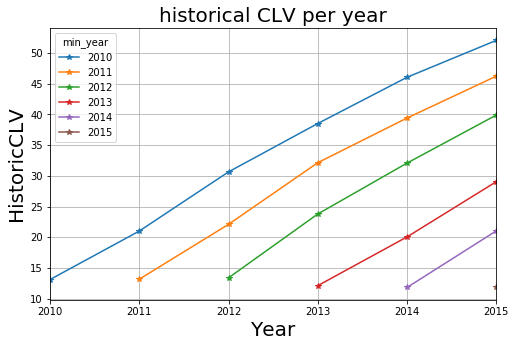

In [32]:
# pivoot
# plot


active_customers_stat.reset_index().pivot(index='year', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="*-")

#
# set titles for figure, x, y
plt.title('historical CLV per year',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()

<font size="2">If we want to know just the age of customers in months (e.g we want customers who are 12 months old considered the same instead of separate cohorts), we need to bring it to common scale:

## EX 2: 

1. Calculate the number of active months for each customer,and add a new column to `active_customers_stat` and name it as `months_active` 

In [34]:
# add month active
# TODO:
#active_customers_stat['months_active'] = ?
active_customers_stat['months_active'] = (active_customers_stat['year'] - active_customers_stat['min_year'] + 1) * 12


active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans,historicCLV,months_active
0,2010,2010,172,1.000000,1.511628,8.673346,13.110872,12
1,2010,2011,93,0.540698,1.903226,7.676723,21.010756,24
2,2010,2012,104,0.604651,1.875000,8.502667,30.650407,36
3,2010,2013,91,0.529070,1.802198,8.265610,38.531570,48
4,2010,2014,103,0.598837,1.582524,7.947975,46.063663,60


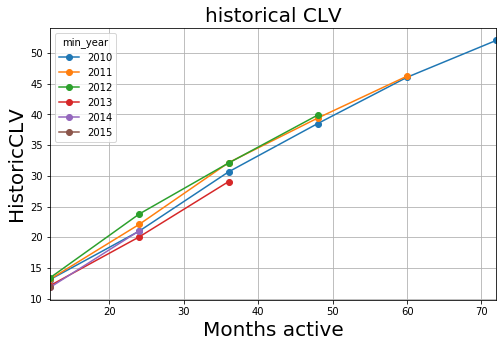

In [35]:
# pivot, plot
active_customers_stat.reset_index().pivot(index='months_active', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="-o")


# set titles for figure, x, y
plt.title('historical CLV',fontsize=20)
plt.xlabel('Months active', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()

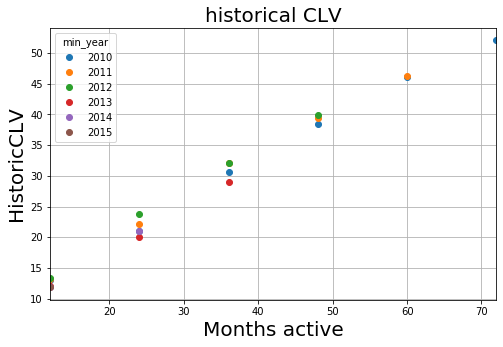

In [36]:
# pivot, plot
active_customers_stat.reset_index().pivot(index='months_active', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="o")


# set titles for figure, x, y
plt.title('historical CLV',fontsize=20)
plt.xlabel('Months active', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()

In [0]:
# comment below till the simple linear regression

<font size="2">The baseline CLV for the oldest customers (5 years of activity) is **~50 euros**. 
    
We can also calculate weighted averages, where each cohort is weighted by the number of customers:

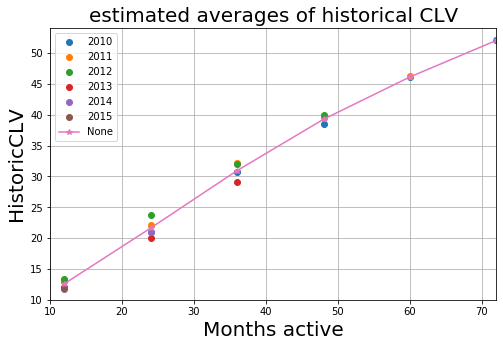

In [37]:
active_customers_stat['vol'] = active_customers_stat['historicCLV']*active_customers_stat['customers_unique']
weighted_historic_CLV = active_customers_stat.groupby('months_active')


weighted_clv = weighted_historic_CLV['vol'].sum() / weighted_historic_CLV['customers_unique'].sum()

active_customers_stat.reset_index().pivot(index='months_active', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="o")

weighted_clv.plot(figsize=(8,5), grid=True, style="*-")

# set titles for figure, x, y
plt.title('estimated averages of historical CLV',fontsize=20)
plt.xlabel('Months active', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)
plt.ylim(ymin=10)
plt.xlim(xmin=10)
plt.legend()


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()

### 2. Apply second amethod to calculate the CLV using machine learning method.

<font size="2">**Simple Linear regression** Simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥.
    
    

<font size="2"> The idea is we need to train our  model using historical data to predict future data. To predict the **current values (to fit the model)**, and use this model for future values?



* Now we need to predict the **CLV** based on only one feature which is the number of active months.

In [38]:
pd.DataFrame(weighted_clv ,columns=['historical_CLV']).reset_index(level=0)

,months_active,historical_CLV
0,12,12.604520
1,24,21.648106
2,36,30.962415
3,48,39.285518
4,60,46.147536
5,72,52.072965


In [40]:
#reshape(): LinearRegression() expects X to be 2D
x = weighted_clv.reset_index().months_active.values.reshape(-1, 1) # single feature
y = weighted_clv.values.reshape(-1, 1) # target/label


In [41]:
# sklearn package to apply simple machine learning methods
from sklearn.linear_model import LinearRegression

# fit x feature (months active) to y value (CLV)
x = weighted_clv.reset_index().months_active.values.reshape(-1, 1) # features
y = weighted_clv.values.reshape(-1, 1) # target/lebel/outcome

# get instance from the LinearRegression class
model = LinearRegression()

# teach the LinearRegression algorithm "fitting the data"
model.fit(x, y) 

# prediction
y_pred = model.predict(x)

print('predicted response:', y_pred, sep='\n')

print('\nModel coefficient: ', model.coef_)
print('Model intercept', model.intercept_)



predicted response:
[[13.84658471]
 [21.82268815]
 [29.79879158]
 [37.77489502]
 [45.75099845]
 [53.72710189]]

Model coefficient:  [[0.66467529]]
Model intercept [5.87048128]


<font size="2">That is, model for calculating historical **CLV** using months of activity is:

<font size="2">$CLV = 0.66 * months\_active + 5.87 $

<font size="2">Let's check the model predictions:


/Users/enlik/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 11.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


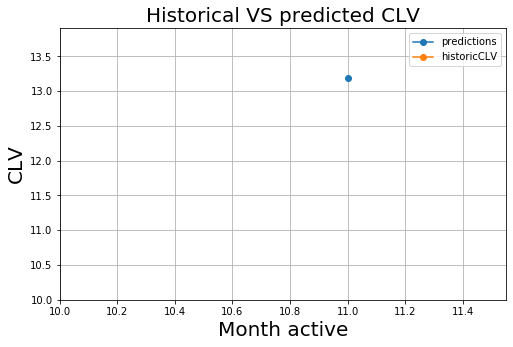

In [42]:
# sample for our single feature months active x
x = pd.Series(range(11, 14, 125)) # new  unseen data 

# predict new data or unseen data
predictions = model.predict(x.values.reshape(-1, 1))


predicted_clv = pd.DataFrame({'months_active': x, 
                              'predictions': predictions.reshape(-1)})

predicted_clv.join(
    pd.DataFrame({'historicCLV': weighted_clv}), on='months_active'
).set_index('months_active').plot(figsize=(8,5), grid=True, style="-o")

# set titles for figure, x, y
plt.title('Historical VS predicted CLV',fontsize=20)
plt.xlabel('Month active', fontsize=20)
plt.ylabel('CLV',fontsize=20)
plt.ylim(ymin=10)
plt.xlim(xmin=10)
plt.legend()


plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

plt.show()

<font size="2">**Multiple linear regression**

<font size="2">Now, what if we are more ambitious? Our desire is not just to fit general function, but to **predict amount spent for each customer**. Can we do that? Depends on the data. Assume that we performed a questionnaire upon the registration, collected some clicks on our website and also have information about proposed discounts for some of the customers:

In [43]:
# read survey dataset, will use it later
survey = pd.read_csv('lab_04_customer_transact_survey.csv')
survey.head()


,customer_id,gender,age,discount_proposed,clicks_in_eshop
0,1,1,71,0,1
1,2,1,42,1,3
2,3,1,49,1,3
3,4,1,71,0,1
4,5,1,71,0,1


<font size="2">Next step is to think, how to plan our experiment. What we want to predict? We decided to predict for all customers who made transactions in their first year $(t_0)$, what would be the amount of money spent next year $(t_1)$ **(our target varible)**$. For that reason we will discard:
    
   1. all customers who do not have the information about $t_1$
   2. all the information about future years $t_k$, where $k>1$

In [44]:
# read our original transzction dataset
df = pd.read_csv("lab_04_clv_transactions.csv")

# copy the original df
df_year = df 


# we take only year
df_year['year'] = df_year.transaction_date.apply(lambda x: pd.to_datetime(x).date().year) 
df = df_year 


group = df.groupby('customer_id')
df['min_year'] = group['year'].transform('min')
df['max_year'] = group['year'].transform('max')
df['years_active'] = df['max_year'] - df['min_year'] +1

active_customers = pd.DataFrame()
group = df.groupby(['customer_id', 'year'])


active_customers['transaction_per_customer'] = group['customer_id'].apply(lambda x: x.size)
active_customers['amount_per_customer'] =group['amount'].sum()
active_customers['amount_per_transaction'] = active_customers['amount_per_customer'] / active_customers['transaction_per_customer']
active_customers['min_year'] = group['min_year'].first()
active_customers['years_active'] = group['years_active'].first()

active_customers.head(10)




transaction_per_customer  amount_per_customer  \
customer_id year                                                  
1           2012                         1                20.96   
2           2012                         2                14.81   
            2013                         2                15.12   
            2014                         4                17.79   
3           2012                         1                21.58   
            2013                         2                25.35   
            2014                         2                 7.68   
            2015                         2                 7.83   
4           2015                         1                 0.54   
5           2015                         2                21.44   

                  amount_per_transaction  min_year  years_active  
customer_id year                                                  
1           2012                 20.9600      2012             1  
2           2012                  7.4050      2012             3  
            2013                  7.5600      2012             3  
            2014                  4.4475      2012             3  
3           2012                 21.5800      2012             4  
            2013                 12.6750      2012             4  
            2014                  3.8400      2012             4  
            2015                  3.9150      2012             4  
4           2015                  0.5400      2015             1  
5           2015                 10.7200      2015             1

In [45]:
dff = active_customers.rename_axis(['customer_id', 'year']).reset_index()

# more than one year active
dff =  dff.loc[dff['years_active'] >1]

grouped = dff.groupby('customer_id')



# new dataframe for new features.
newdf = pd.DataFrame()

newdf['transaction_per_customer_1'] = grouped['transaction_per_customer'].first() # getting the firs element from each group
newdf['amount_per_customer_1'] = grouped['amount_per_customer'].first() # first year
newdf['amount_per_transaction_1'] = grouped['amount_per_transaction'].first()
newdf['amount_per_customer_2'] = grouped['amount_per_customer'].apply(lambda x: x.values[1]) # second yaer
newdf = newdf.rename_axis(['customer_id']).reset_index()
newdf.head(10)

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,amount_per_customer_2
0,2,2,14.81,7.405000,15.12
1,3,1,21.58,21.580000,25.35
2,7,2,26.46,13.230000,8.08
3,8,1,6.21,6.210000,2.35
4,9,3,19.21,6.403333,11.46
5,10,1,12.37,12.370000,5.99
6,12,3,47.09,15.696667,4.78
7,13,2,10.17,5.085000,59.67
8,14,1,28.72,28.720000,10.08
9,15,2,24.47,12.235000,5.14


In [47]:
# Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, 
# add empty / NaN values in the result.
model_data = newdf.merge(survey, on='customer_id', how='left')
model_data['gender'] = model_data.gender.astype('category')
model_data['discount_proposed'] = model_data.discount_proposed.astype('category')
model_data.head()


,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,amount_per_customer_2,gender,age,discount_proposed,clicks_in_eshop
0,2,2,14.81,7.405000,15.12,1,42,1,3
1,3,1,21.58,21.580000,25.35,1,49,1,3
2,7,2,26.46,13.230000,8.08,0,42,0,1
3,8,1,6.21,6.210000,2.35,0,28,0,1
4,9,3,19.21,6.403333,11.46,1,42,0,1


In [0]:
#model_data

In [0]:
# model_data = newdf.merge(survey, on='customer_id', how='left')
# model_data['gender'] = model_data.gender.astype('category')
# model_data['discount_proposed'] = model_data.discount_proposed.astype('category')

# model_data.info()
# model_data = model_data.drop('customer_id', axis=1)
# model_data.head()
# # X = model_data.loc[:, model_data.columns != 'amount_per_customer_2']
# # y = model_data[['amount_per_customer_2']]
# # x

In [48]:
# features
x = model_data.loc[:, model_data.columns != 'amount_per_customer_2'] # drop our target variable 
x

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,gender,age,discount_proposed,clicks_in_eshop
0,2,2,14.81,7.405000,1,42,1,3
1,3,1,21.58,21.580000,1,49,1,3
2,7,2,26.46,13.230000,0,42,0,1
3,8,1,6.21,6.210000,0,28,0,1
4,9,3,19.21,6.403333,1,42,0,1
...,...,...,...,...,...,...,...,...
652,994,1,2.45,2.450000,1,18,0,1
653,997,1,7.93,7.930000,0,42,0,1
654,998,1,16.14,16.140000,0,24,1,4
655,999,2,2.05,1.025000,0,42,1,3


In [49]:
# target

y = model_data[['amount_per_customer_2']] # target varable that we need to predict
y


,amount_per_customer_2
0,15.12
1,25.35
2,8.08
3,2.35
4,11.46
...,...
652,5.45
653,11.88
654,59.48
655,13.61


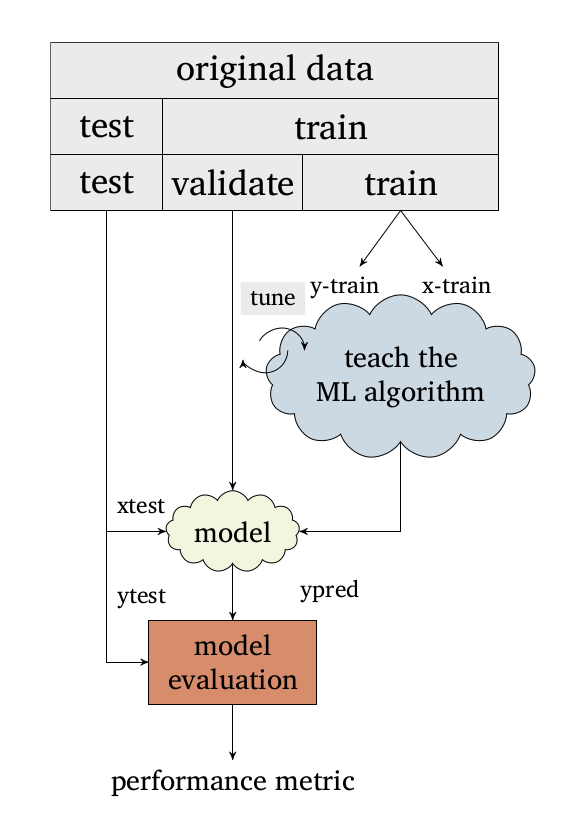

In [0]:
# from IPython.display import Image
# Image(filename='ml2.png') 

In [50]:
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.metrics import mean_squared_error # for model evaluation
from sklearn.metrics import r2_score # model evaluation
from sklearn.metrics import median_absolute_error # model evaluation



X = x
y = y

# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

# make an instance from the lr model
lin_reg_mod = LinearRegression()

# train the model - teach the model
lin_reg_mod.fit(X_train, y_train)

# predict unseen data (test dat)
pred = lin_reg_mod.predict(X_test)


# Evaluate the lr model

# MAE
test_set_mae = median_absolute_error(y_test, pred)
# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
#R^2
test_set_r2 = r2_score(y_test, pred)
#MSE
test_set_mse = (mean_squared_error(y_test, pred))

metric_values = [test_set_mse, test_set_rmse, test_set_mae,test_set_r2 ]
idx = ['MSE', 'RMSE', 'MAE', 'R2']
#pd.DataFrame(metric_values, index=idx)


print("mean squared error is: ", test_set_mse)
print("root mean squared error is: ", test_set_rmse)
print("mean absolute error is: ", test_set_mae)
print("rscore: ", test_set_r2)

pd.DataFrame(metric_values, columns=['Model_evaluation'],index=idx)


mean squared error is:  25.85661354806581
root mean squared error is:  5.084939876543852
mean absolute error is:  2.7607870314935035
rscore:  0.8504003133874145


,Model_evaluation
MSE,25.856614
RMSE,5.084940
MAE,2.760787
R2,0.850400


## Info (One of exam questions)
What does this value tell?
- MSE value means there are some outliers that captured by MSE
- R2 value means this model near to 1, it tells it more better than means model

In [51]:
print('coef: ', lin_reg_mod.coef_)
print('\nintercept: ', lin_reg_mod.intercept_)

coef:  [[-1.41464813e-04  2.50016299e-01 -2.37115657e-04 -2.38937762e-02
  -2.89772698e-01  2.24908103e-01 -3.66101256e+01  2.38878044e+01]]

intercept:  [-25.43919346]


# Principal Component Analysis (PCA)

1. Imagin that you have many features (variables - columns) in your data set, you might ask the question, **Can we use only a subset from these features (feature space)? and How to chose them?**. In technical terms, you want to `reduce the dimension of your feature space.` By reducing the dimension of your feature space. 


2. Reducing the dimension of the `feature space` is called `dimensionality reduction.` There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

    * **Feature Elimination:** is what it sounds like we reduce the feature space by eliminating features.
        * `Advantages of feature elimination` methods include simplicity and maintaining interpretability of your variables.
        * `As a disadvantage,` though, you gain no information from those variables you’ve dropped.
    * **Feature Extraction:** Let's say we have ten `independent variables.` In **feature extraction,** we create `ten “new” independent variables,` where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and `order these new variables by how well they predict our dependent variable.`
    
  
3. You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!


4. **Principal component analysis** is a technique for `feature extraction` — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!

## PCA: is a very technical method relying on in-depth linear algebra algorithms, that brings together:

   1. A measure of how each variable is associated with one another. `(Covariance matrix.)`
   2. The directions in which our data are dispersed. `(Eigenvectors.)`
   3. The relative importance of these different directions. `(Eigenvalues)`


## When should I use PCA?

   1. Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
   2. Do you want to ensure your variables are independent of one another?
   3. Are you comfortable making your independent variables less interpretable?


* If you answered `“yes”` to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you should not use PCA.

In [52]:
corr = model_data.corr()
corr.style.background_gradient(cmap='Blues')

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,amount_per_customer_2,age,clicks_in_eshop
customer_id,1,0.0464732,0.00474392,-0.0218862,-0.0496258,-0.035197,-0.0165777
transaction_per_customer_1,0.0464732,1,0.725746,0.046075,0.211662,0.103308,0.178232
amount_per_customer_1,0.00474392,0.725746,1,0.643132,0.164329,0.0959282,0.130854
amount_per_transaction_1,-0.0218862,0.046075,0.643132,1,0.00811911,0.00906553,-0.00142809
amount_per_customer_2,-0.0496258,0.211662,0.164329,0.00811911,1,0.530529,0.840909
age,-0.035197,0.103308,0.0959282,0.00906553,0.530529,1,0.536013
clicks_in_eshop,-0.0165777,0.178232,0.130854,-0.00142809,0.840909,0.536013,1


In [53]:
model_data.head()

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,amount_per_customer_2,gender,age,discount_proposed,clicks_in_eshop
0,2,2,14.81,7.405000,15.12,1,42,1,3
1,3,1,21.58,21.580000,25.35,1,49,1,3
2,7,2,26.46,13.230000,8.08,0,42,0,1
3,8,1,6.21,6.210000,2.35,0,28,0,1
4,9,3,19.21,6.403333,11.46,1,42,0,1


In [54]:
x = model_data.loc[:, model_data.columns != 'amount_per_customer_2'] # features 
y = model_data[['amount_per_customer_2']] # target / label

In [55]:
x.shape

(657, 8)

In [56]:
y.shape

(657, 1)

### PCA in Python:

In [57]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore');


In [58]:
# features and target
X = x
y = y

# convert features to numpy array
X = X.to_numpy()

# n_components: Number of components (features) to keep.

# whiten: When True (False by default) the components_ vectors are multiplied by the square root of n_samples
# and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

# svd (Singular Value Decomposition): project data to a lower dimensional space.

# get an instance from PCA
pca = PCA(n_components=8,whiten=True,svd_solver='randomized')

# fitting or teaching PCA 
pca = pca.fit(X)

# generate new features based on PCA technique by using transform()
dataPCA = pca.transform(X)

In [59]:
y[:500]

,amount_per_customer_2
0,15.12
1,25.35
2,8.08
3,2.35
4,11.46
...,...
495,32.44
496,12.51
497,3.49
498,7.95


In [61]:
# manual method to split data (original data)
train_original = X[:500]
test_original = X[500:]

train_y_orig = y[:500]
test_y_orig = y[500:]


# Split traing and test
train_pca = dataPCA[:500]
test_pca = dataPCA[500:]

In [62]:
# R2 Score
from sklearn.metrics import r2_score
#y_true = [3, -0.5, 2, 7]
#> y_pred = [2.5, 0.0, 2, 8]
#r2_score(y_true, y_pred)

def lets_try(x_train, y_train, x_test,y_test):
    results={}
    def test_model(clf):  
        # train the model - teach the model
        clf.fit(x_train, y_train)

        # predict unseen data (test dat)
        pred = clf.predict(x_test)

        # R2
        r2_val_score = r2_score(y_test, pred)

        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results



,R Square Score
Linear,0.818799


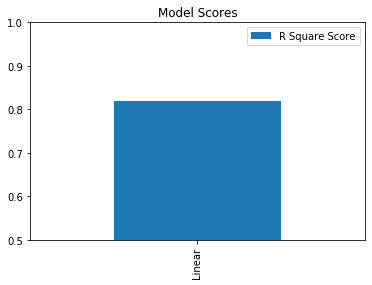

In [64]:
# orig model
lets_try(train_original,train_y_orig, test_original,test_y_orig)


,R Square Score
Linear,0.818799


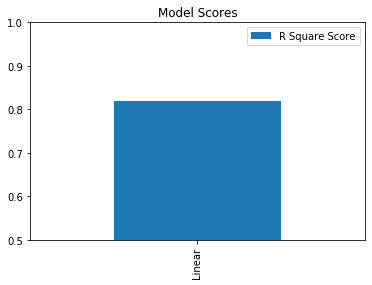

In [65]:
# PCA model
lets_try(train_pca, train_y_orig, test_pca,test_y_orig)